In [1]:
# 최적화optimization : 손실 함수의 값을 가능한 한 낮추는 가중치 매개변수를 찾는 것
# 지금까지 최적의 매개변수 값을 찾는 단서로 매개변수의 기울기(미분 값)을 이용했고, 이것을 확률적 경사 하강법SGD이라고 부른다.
# 그러나 이것은 최적화 방법 중의 하나에 불과하다.

class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key] # params은 가중치 매개변수들을, grads는 기울기들을 저장하고 있는 딕셔너리

In [ ]:
# pseudocode

network = TwoLayerNEt(...)
optimizer = SGD() # 최적화 방법을 SGD로 설정

for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = netwrok.params
    optimizer.update(params, grads) # 매개변수 갱신 by SGD
    ...

In [ ]:
# SGD의 단점
'''
비등방성anisotropy 함수(방향에 따라 성질, 즉 기울기)에서는 탐색 경로가 비효율적이다.(지그재그로 갱신되어, 비효율적인 움직임을 보여준다)
이렇게 지그재그로 탐색하는 근본 원인은, 비등방성 함수에서 기울어진 방향이 본래의 최솟값을 가리키지 않기 때문이다.(낮아지는 곳을 가리키기는 하지만, 그곳이 최솟값은 아니다)
'''

# 이러한 SGD의 단점을 개선해주는 모멘텀, AdaGrad, Adam이라는 세 방법을 알아본다.

In [3]:
# 모멘텀Momentum
# 운동량을 뜻하는 단어로, 물리와 관계가 있다. v라는 변수를 사용하고, 이는 물리에서 말하는 속도를 가리킨다.
# 모멘텀의 v 수식은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리 법칙을 보여준다.

class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None: # 최초 update시 매개변수(params)와 같은 구조의 데이터를 딕셔너리 변수로 저장한다.
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key] # 운동량*속도 - 학습량*손실함수기울기
            params[key] += self.v[key]

# 갱신 경로가 공이 그릇 바닥을 구르듯 움직이며, SGD에 비해 지그재그 정도가 덜하다.
# x축의 힘은 작지만 방향은 변하지 않아 가속하고, y축의 힘은 크지만 방향이 변해 상쇄되므로 속도가 안정적이지 않다.

In [4]:
# 학습률이 너무 작으면 학습 시간이 매우 길어지고, 학습률이 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다.
# 따라서 학습률을 정해주는 효과적 기술로 학습률 감소learning rate decay를 사용한다.
# 처음에는 크게 학습하다가 점차 조금씩 작게 학습하는 방법이다.

In [6]:
# 학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 '전체'의 학습률을 일괄적으로 낮추는 것이다.
# Adagrad는 이를 발전시킨 방법으로, '각각의' 매개변수에 '맞춤형' 값을 만들어준다. 이를 적응적adaptive으로 학습률을 조정한다고 한다.
# 이 경우 무한히 학습하다 보면 갱신량이 0이 되어 전혀 갱신이 되지 않는데, 이를 개선한 방법으로 RMSProp이라는 방법이 있다.
# RMSProp은 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다. 이를 지수이동평균Exponential Moving Average,EMA이라고 하며, 과거 기울기의 반영 정도를 기하급수적으로 감소시킨다.

class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
        
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # self.h[key]가 0이더라도 1e-7이 있으므로 division by zero 오류를 막아줌

# 최솟값을 향해 효율적으로 움직인다.

In [7]:
# Adam
# 직관적으로는 모멘텀과 AdaGrad를 융합한 기법. 자세히는 논문을 참조하자.

class Adam:

    """Adam (http://arxiv.org/abs/1412.6980v8)"""

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)
            
# 모멘텀처럼 공이 구르는 모양이되, 모멘텀보다 공의 흔들림이 적다.

===========iteration:0===========
SGD:2.3899609125444066
Momentum:2.3307542790377513
AdaGrad:1.9179303831079877
Adam:2.1957665047155324
===========iteration:100===========
SGD:1.5842773667796173
Momentum:0.5184163843085433
AdaGrad:0.24089407921383615
Adam:0.3852618859805014
===========iteration:200===========
SGD:0.8304722962770839
Momentum:0.25539483531605356
AdaGrad:0.07386717307164643
Adam:0.16177800928262748
===========iteration:300===========
SGD:0.5247451158135441
Momentum:0.19973252564498445
AdaGrad:0.07429441339679682
Adam:0.13949916104373739
===========iteration:400===========
SGD:0.3555940882661985
Momentum:0.18979386402712123
AdaGrad:0.03772235946127519
Adam:0.08898906940655273
===========iteration:500===========
SGD:0.3732744511322442
Momentum:0.11364995195533566
AdaGrad:0.03688674770184099
Adam:0.050360571188360403
===========iteration:600===========
SGD:0.35875694487808046
Momentum:0.10015742608325148
AdaGrad:0.0335161497243637
Adam:0.05408287411151798
===========iteratio

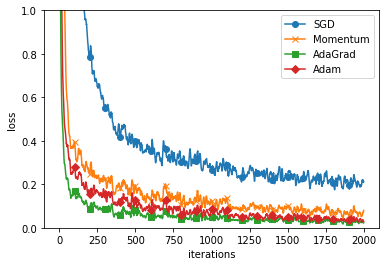

In [9]:
# 풀어야 할 문제가 무엇이느냐에 따라 위에서 소개한 4가지 기법 중 하나를 선택하면 된다. 각자의 장단점이 있다.

# coding: utf-8
import os
import sys
sys.path.append(os.pardir)
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []    


for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)
    
        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)
    
    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()